In [56]:
# Customer Churn Analysis

In [57]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Data Loading and Understanding

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [59]:
df.head() 
# df.tail()
#pd.set_option("display.max_columns",None)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
# Dropping Columns

df = df.drop (columns= ["customerID"])

In [62]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [63]:
# Printing the unique values in all the categorical columns

numerical_features_list  = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
    print("-"*50)
    

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------------------

In [64]:

print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [65]:
#df["TotalCharges"] = df ["TotalCharges"].astype(float)
df[df["TotalCharges"]==" "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [66]:
len(df[df["TotalCharges"]==" "])

11

In [67]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [68]:
df["TotalCharges"] = df ["TotalCharges"].astype(float)

In [69]:
df.info() # Checking type conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [70]:
# Understanding the class Target Columns

print (df["Churn"].value_counts())

# 'Churn' is imbalanced — more 'No' than 'Yes'.
# This can make the model biased toward predicting 'No'.
# We'll handle it using techniques like class weights or resampling (SMOTE),
# and evaluate using precision, recall, or F1-score instead of just accuracy.


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [71]:
# Exploratory Data Analysis (EDA)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:

def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # Adding vertical lines for Mean and Median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle=":", label="Median")

    plt.legend()
    plt.show()


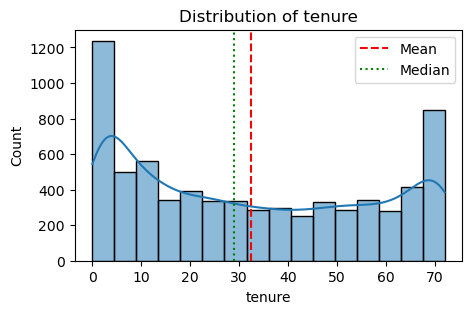

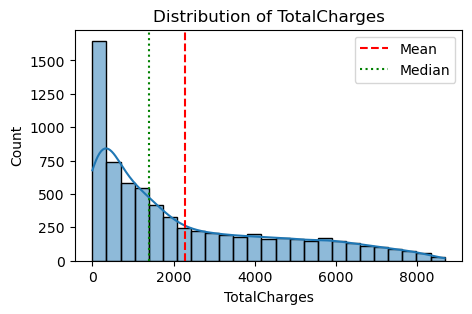

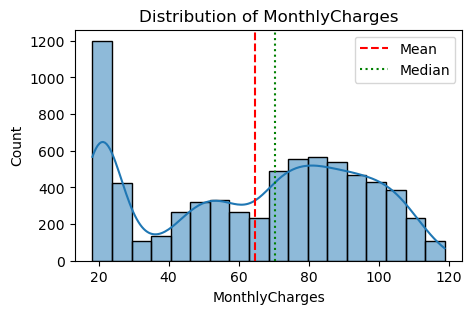

In [74]:
plot_histogram(df, "tenure")
plot_histogram(df, "TotalCharges")
plot_histogram(df, "MonthlyCharges")

In [75]:
# Feature scaling is not needed for tree-based models like Decision Trees, Random Forest, or XGBoost,
# because they split on feature thresholds and don't rely on distance or gradient magnitudes.

# Box Plot

def plot_boxplot(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name) 
    plt.show()


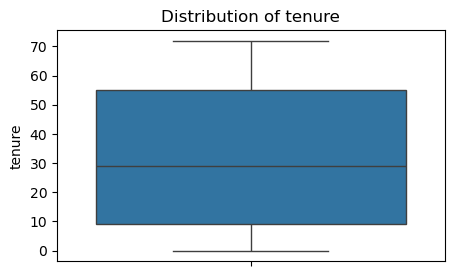

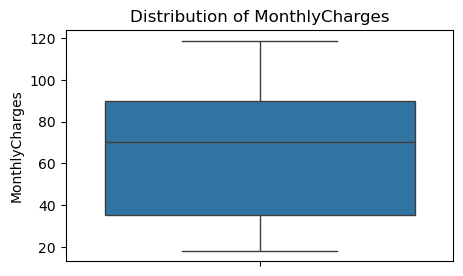

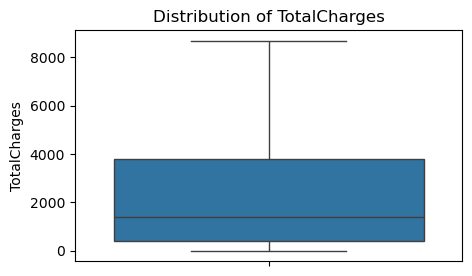

In [76]:
plot_boxplot(df, "tenure")
plot_boxplot(df, "MonthlyCharges")
plot_boxplot(df, "TotalCharges")

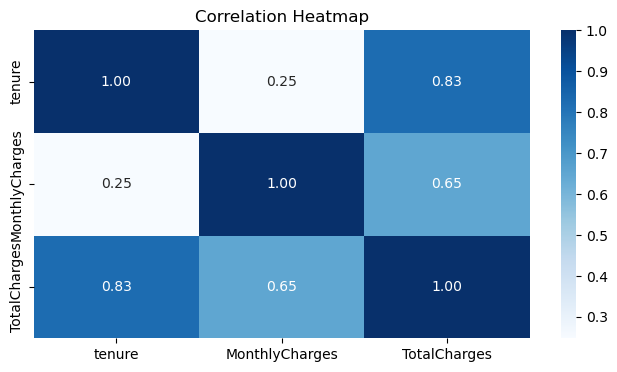

In [77]:
# Correlation Heatmap for Numerical Features:

plt.figure(figsize=(8,4))

corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

# tenure and TotalCharges have a strong correlation (~0.83).
# For tree-based models, it's okay to keep both.
# For linear models, consider dropping one or applying techniques like PCA to reduce multicollinearity. Multicollinearity means some features are highly correlated.
# This can confuse linear models and affect coefficient stability.



In [78]:
# Analysis on Categorical Features:

df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


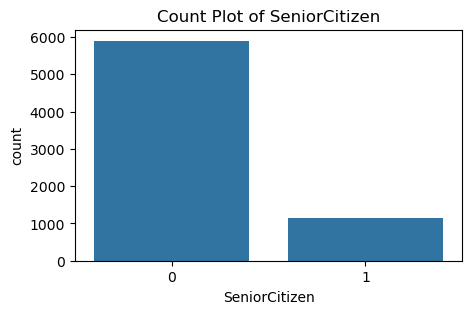

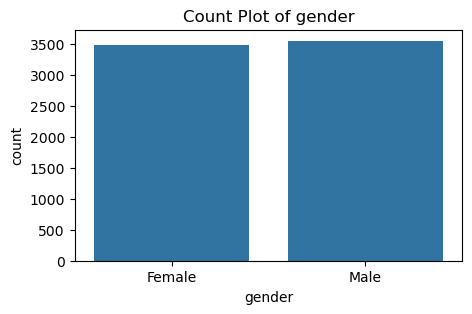

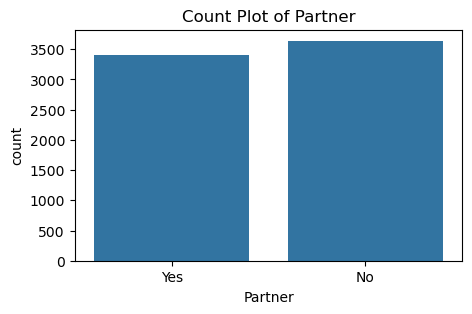

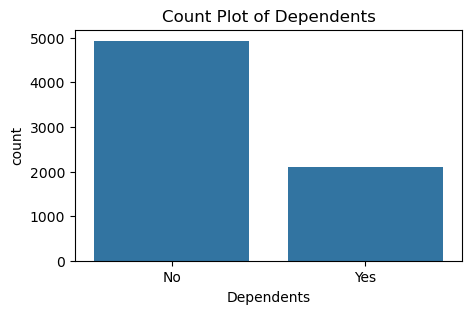

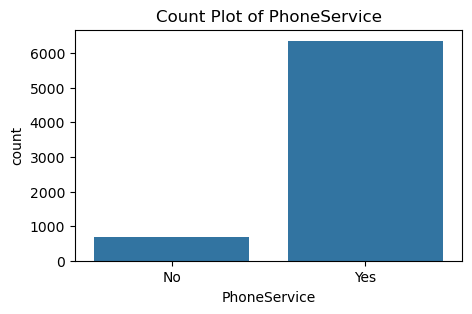

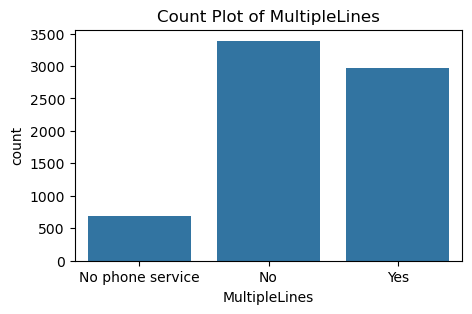

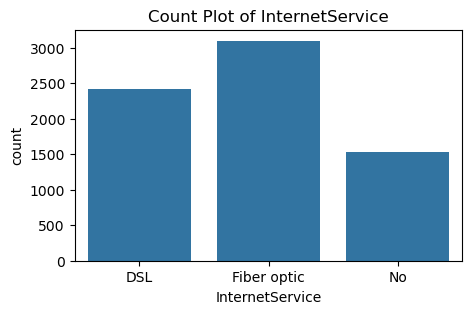

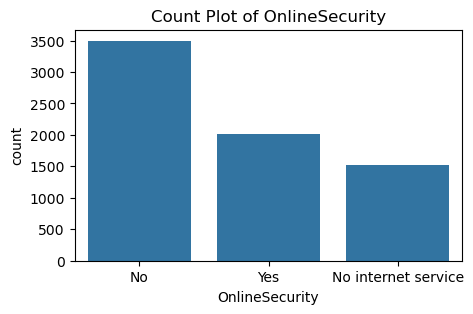

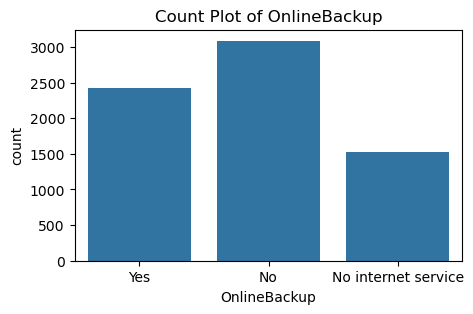

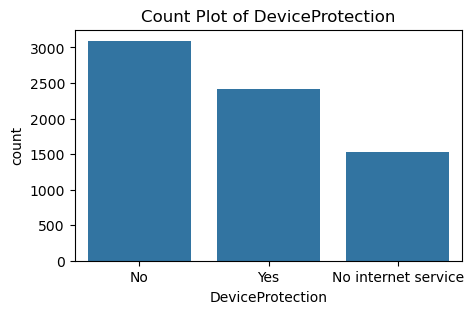

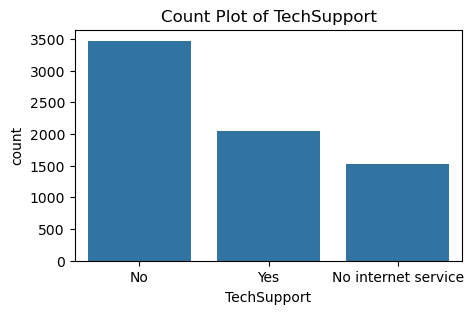

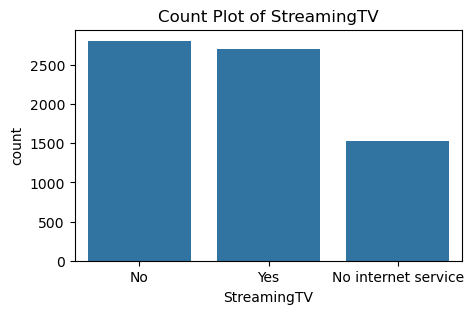

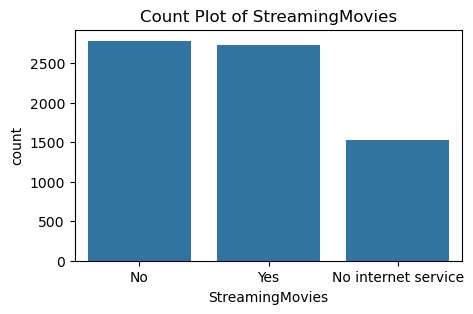

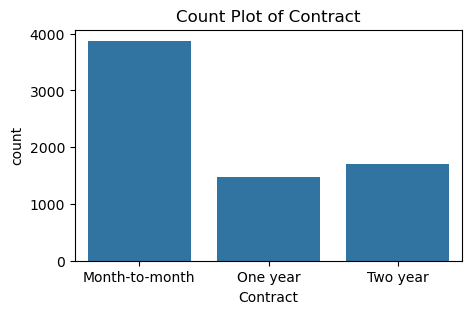

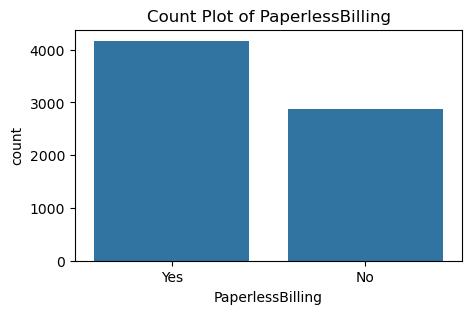

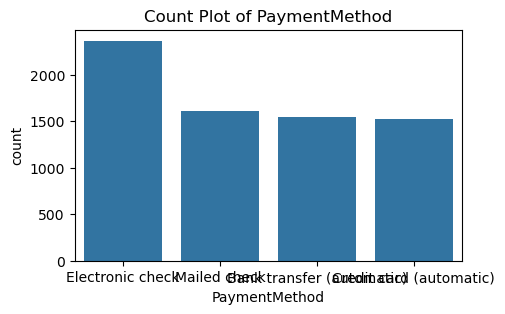

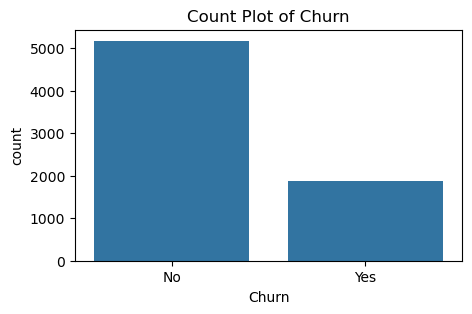

In [80]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

#object_cols


In [81]:
# Data Preprocessing:

# Performing Label Encoding on target column

df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

In [82]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [83]:
# Label Encoding for categorical features:

object_columns = df.select_dtypes(include = "object").columns
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [84]:
encoders = {}

# Iterating through all the columns listed in object_columns (which likely contains categorical columns)
for column in object_columns:
    label_encoder = LabelEncoder()  # Initializing a new LabelEncoder for each column
    df[column] = label_encoder.fit_transform(df[column])  # Fitting and transforming the column into numeric labels
    encoders[column] = label_encoder  # Saving the encoder for future use 
    
# Save the encoders to a file
with open("encoders.pkl", "wb") as f:  
    pickle.dump(encoders, f)  # Storing the encoder objects to a file


In [85]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [86]:
df.head(5) # Verification

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [87]:
# Training and testing 

X = df.drop(columns = ["Churn"])
y = df["Churn"]
print(X)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [88]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(y_train.shape)


(5634,)


In [89]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [90]:
# SMOTE Technique for balancing the dataset

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.shape)

(8276,)


In [91]:
print(y_train_smote.value_counts())


Churn
0    4138
1    4138
Name: count, dtype: int64


In [92]:

# Creatiing a dictionary to store the machine learning models.
# Each model is initialized with a fixed random_state for reproducibility.
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Creating an empty dictionary to store cross-validation results for each model.
cv_scores = {}

# Looping through each model in the dictionary.
for model_name, model in models.items():
    # Printing the name of the model that is being trained.
    print(f"Training {model_name} with default parameters")
    
    # Performing 5-fold cross-validation on the training data.
    # 'cv=5' splits the data into 5 parts, training on 4 parts and testing on 1, then rotating.
    # 'scoring="accuracy"' measures how often the model correctly predicts the target.
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    
    # Storing the cross-validation scores in the dictionary using the model name as the key.
    cv_scores[model_name] = scores
    
    print(f"{model_name} cross-validation accuracy is: {np.mean(scores) * 100:.2f}%")
    print("-"*50)


Training Decision Tree with default parameters


Decision Tree cross-validation accuracy is: 78.09%
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy is: 83.79%
--------------------------------------------------
Training XGBoost with default parameters
Random Forest cross-validation accuracy is: 83.79%
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy is: 83.12%
--------------------------------------------------
XGBoost cross-validation accuracy is: 83.12%
--------------------------------------------------


In [93]:

cv_scores
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [94]:
# Random Forest gives the highest accuracy compared to other models 

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,y_train_smote)

# Model Evaluation on test data

y_test_pred = rfc.predict(X_test)
print("Accuracy Score: \n", accuracy_score(y_test, y_test_pred))
print("-"*50)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("-"*50)
print("Classification Report: \n", classification_report(y_test, y_test_pred))



Accuracy Score: 
 0.7771469127040455
--------------------------------------------------
Confusion Matrix: 
 [[880 156]
 [158 215]]
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [95]:
# XGboost

XGB = XGBClassifier(random_state=42)
XGB.fit(X_train_smote,y_train_smote)

# Model Evaluation on test data

y_test_pred = XGB.predict(X_test)
print("Accuracy Score: \n", accuracy_score(y_test, y_test_pred))
print("-"*50)
print("Confusion Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("-"*50)
print("Classification Report: \n", classification_report(y_test, y_test_pred))



Accuracy Score: 
 0.7821149751596878
--------------------------------------------------
Confusion Matrix: 
 [[876 160]
 [147 226]]
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [96]:
from sklearn.model_selection import RandomizedSearchCV

# Base RF
rfc = RandomForestClassifier(random_state=42)

# Hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=20,        # number of combos to try
    cv=5,             # 5-fold cross-validation
    scoring='f1',     # better for imbalance
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on SMOTE data
random_search.fit(X_train_smote, y_train_smote)

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save tuned model
import pickle
pickle.dump(best_rf, open("random_forest_tuned.pkl", "wb"))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.7792760823278921
Confusion Matrix:
 [[872 164]
 [147 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.58      0.61      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.7792760823278921
Confusion Matrix:
 [[872 164]
 [147 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      103

## XGB Classifier Hyperparameter tuning

In [97]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train_smote, y_train_smote)
best_xgb = random_search_xgb.best_estimator_
print("Best Params:", random_search_xgb.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}


In [98]:
best_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    gamma=1,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = best_xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7877927608232789
Confusion Matrix:
 [[876 160]
 [139 234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.63      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409



## Saving the trained model as a pickle file

In [104]:
# Saving the trained model as a pickle file

# Correct: save the fitted best_rf, not the fresh rfc
model_data = {"model": best_rf, "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [100]:
import pickle

# Save model
with open("xgb_churn.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

# Load model
with open("xgb_churn.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [106]:
# Loading the trained model and the encoders

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

print(loaded_model)

print(feature_names)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_split=5, random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [102]:
# Example customer data for prediction
customer_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85,
}

# print(customer_data)

customer_data_df = pd.DataFrame([customer_data])
with open ("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

print(customer_data_df.head)

# encode categorical features
for column, encoder in encoders.items():
    customer_data_df[column] = encoder.transform(customer_data_df[column])



<bound method NDFrame.head of    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  >


In [107]:
# Making a prediction

prediction = loaded_model.predict(customer_data_df)
pred_prob = loaded_model.predict_proba(customer_data_df)
print(prediction)

print (f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'} ")
print(f"Prediction Probability that customer will churn: {pred_prob[0][1]*100:.2f}%")


# The model predicts that this customer is likely to stay with the company,
# but there is a small 17% risk that they might churn.'''

[0]
Prediction: No Churn 
Prediction Probability that customer will churn: 42.77%


In [108]:
# Make prediction
prediction = best_xgb.predict(customer_data_df)
pred_prob = best_xgb.predict_proba(customer_data_df)

print(f"Prediction: {'Churn' if prediction[0]==1 else 'No Churn'}")
print(f"Churn Probability: {pred_prob[0][1]*100:.2f}%")

Prediction: Churn
Churn Probability: 72.79%


In [109]:
from sklearn.calibration import CalibratedClassifierCV

# For RandomForest
calibrated_rf = CalibratedClassifierCV(best_rf, method="isotonic", cv=5)
calibrated_rf.fit(X_train_smote, y_train_smote)

# For XGBoost
calibrated_xgb = CalibratedClassifierCV(best_xgb, method="isotonic", cv=5)
calibrated_xgb.fit(X_train_smote, y_train_smote)

CalibratedClassifierCV(cv=5,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.8,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None,
                                               feature_weights=None, gamma=1,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.05, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=7,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None, ...),
                       method='isotonic')

In [110]:
# Encode customer data as before
customer_data_df = pd.DataFrame([customer_data])
for column, encoder in encoders.items():
    customer_data_df[column] = encoder.transform(customer_data_df[column])
customer_data_df = customer_data_df[feature_names]

# Predict probabilities
rf_prob = calibrated_rf.predict_proba(customer_data_df)[0][1]
xgb_prob = calibrated_xgb.predict_proba(customer_data_df)[0][1]

print(f"Calibrated RF Churn Probability: {rf_prob*100:.2f}%")
print(f"Calibrated XGB Churn Probability: {xgb_prob*100:.2f}%")

Calibrated RF Churn Probability: 38.93%
Calibrated XGB Churn Probability: 65.04%
